Importing releveant libraries

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
sns.set()

Loading data

In [41]:
iris_data = pd.read_csv("Iris.csv")
iris_data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


Gaining information from data

In [42]:
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


Statistical Insight

In [43]:
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


Checking For Duplicate Entries

In [44]:
iris_data[iris_data.duplicated()]

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species


Checking the balance

In [45]:
iris_data["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

Data Visualization
Species count

<Axes: title={'center': 'Species Count'}, xlabel='count', ylabel='Species'>

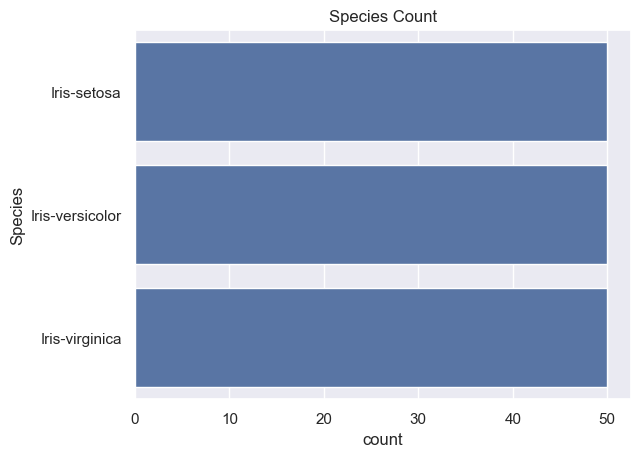

In [8]:
plt.title("Species Count")
sns.countplot(iris_data["Species"])

Uni-variate Analysis
Comparison between various species based on sepal length and width

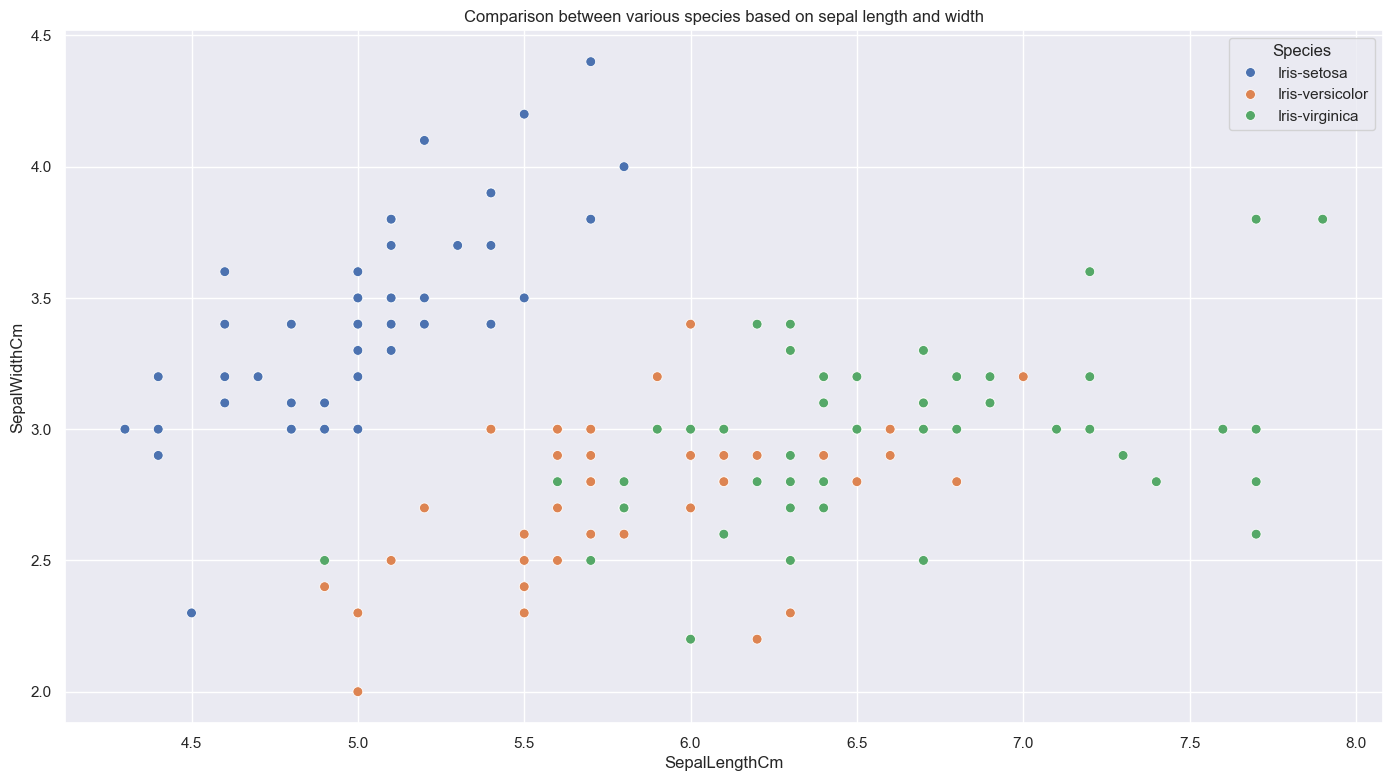

In [10]:
plt.figure(figsize=(17, 9))
plt.title("Comparison between various species based on sepal length and width")

# Verify the correct usage of scatterplot
# Check the documentation for scatterplot to ensure the correct usage
# You may need to specify 'data' parameter if iris_data is not defined inside the function
sns.scatterplot(x=iris_data["SepalLengthCm"], y=iris_data["SepalWidthCm"], hue=iris_data["Species"], s=50)

plt.show()

Comparison between various species based on petal length and width

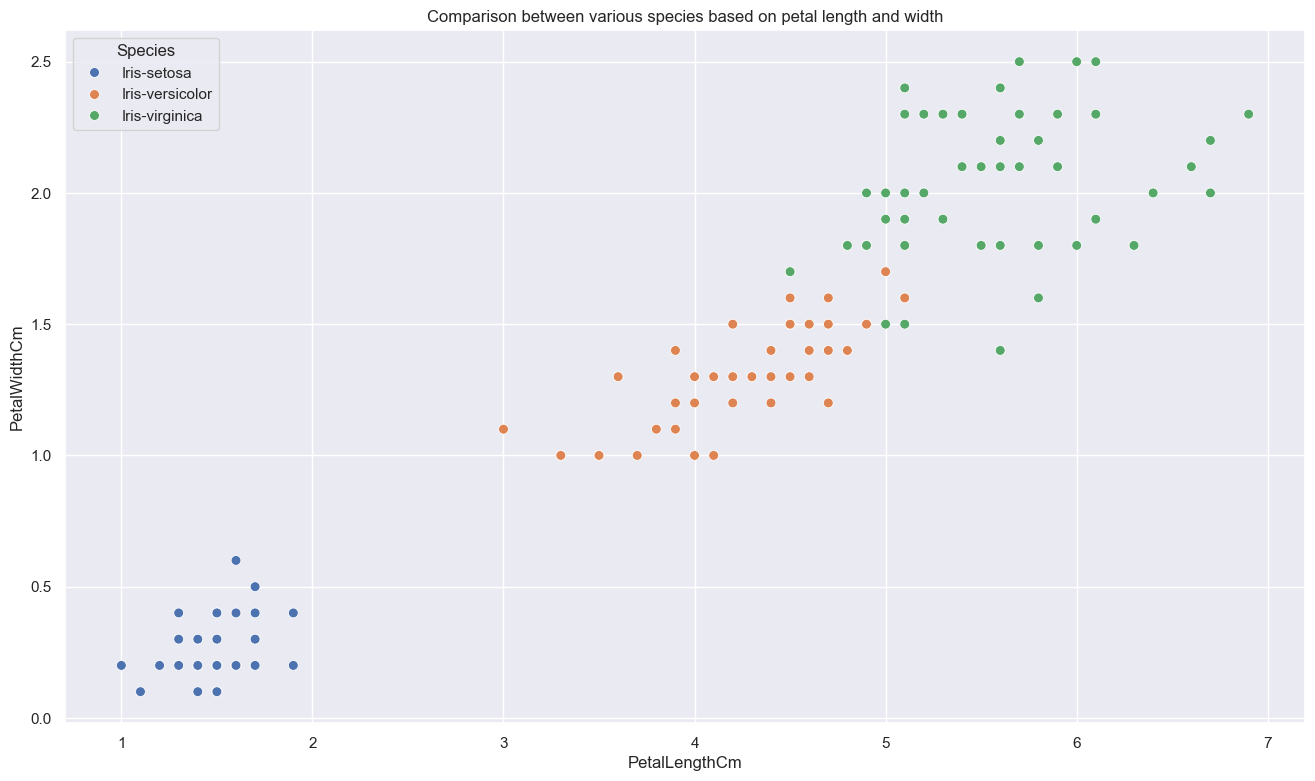

In [13]:
plt.figure(figsize=(16, 9))
plt.title('Comparison between various species based on petal length and width')
sns.scatterplot(x = iris_data['PetalLengthCm'], y = iris_data['PetalWidthCm'], hue=iris_data['Species'], s=50)

plt.show()

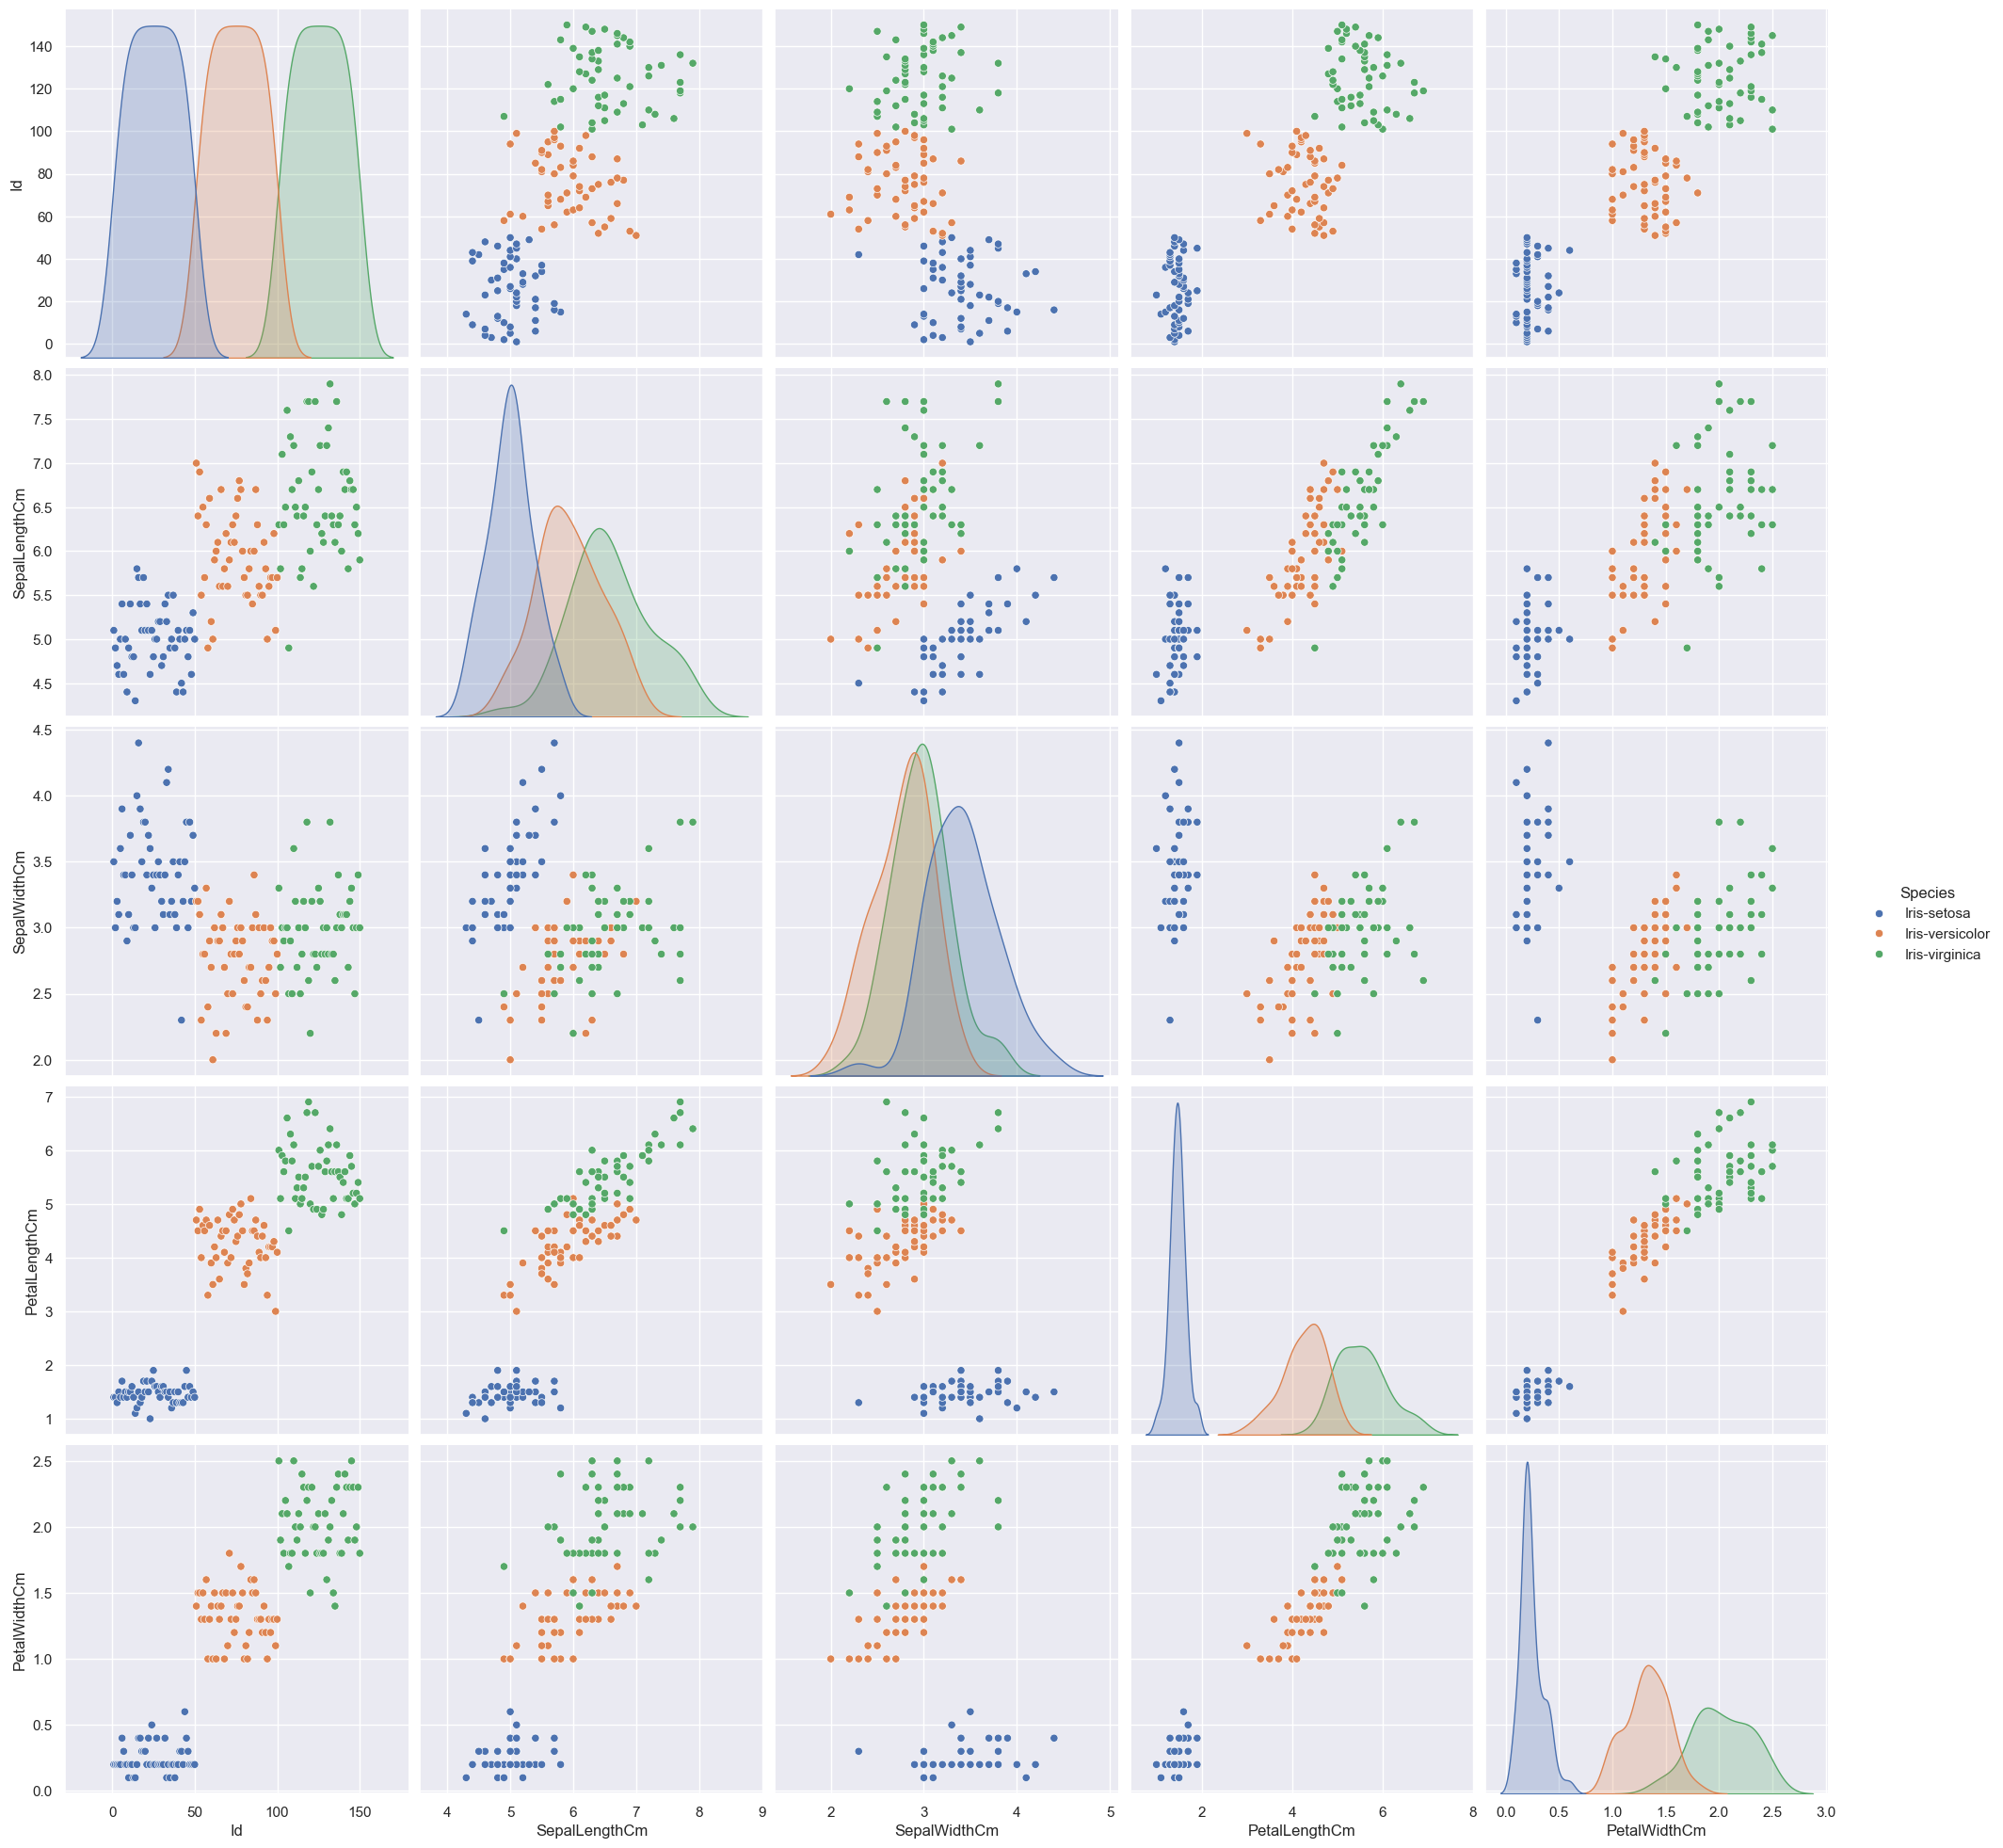

In [16]:
sns.pairplot(iris_data,hue="Species",height=4)

Bi-variate Analysis

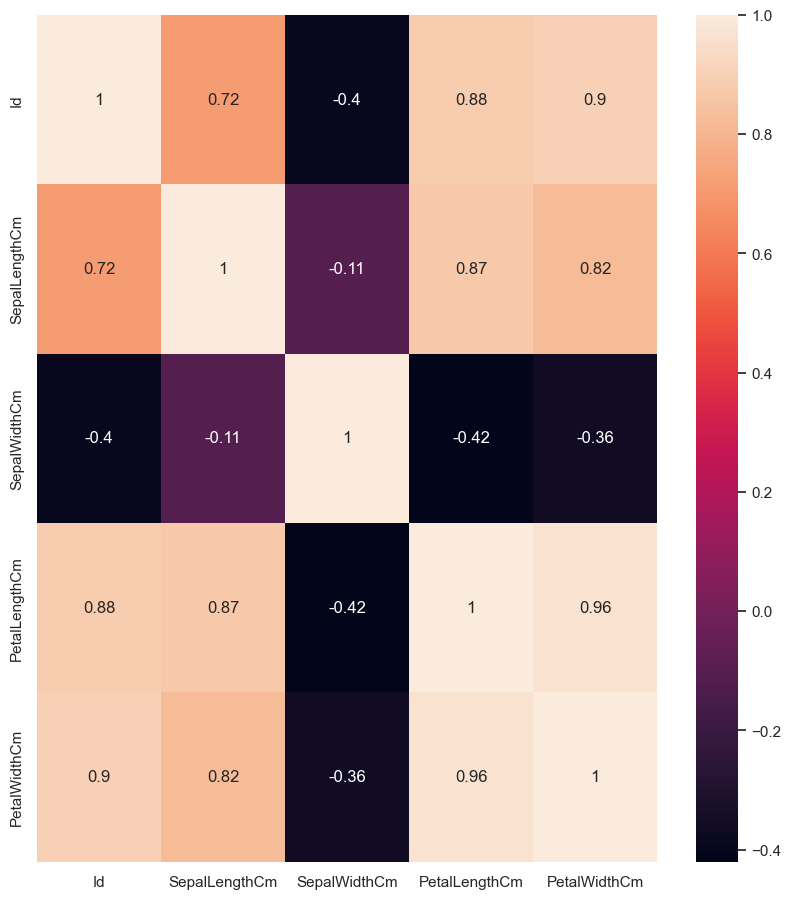

In [19]:
# Checking Correlation

# Exclude the 'Species' column from the correlation analysis
numeric_data = iris_data.drop(columns=['Species'])

# Plot the heatmap
plt.figure(figsize=(10, 11))
sns.heatmap(numeric_data.corr(), annot=True)
plt.show()


Checking Mean & Median Values for each species

In [25]:
iris_data.groupby("Species").agg(["mean", "median"])

Id        SepalLengthCm        SepalWidthCm         \
                  mean median          mean median         mean median   
Species                                                                  
Iris-setosa       25.5   25.5         5.006    5.0        3.418    3.4   
Iris-versicolor   75.5   75.5         5.936    5.9        2.770    2.8   
Iris-virginica   125.5  125.5         6.588    6.5        2.974    3.0   

                PetalLengthCm        PetalWidthCm         
                         mean median         mean median  
Species                                                   
Iris-setosa             1.464   1.50        0.244    0.2  
Iris-versicolor         4.260   4.35        1.326    1.3  
Iris-virginica          5.552   5.55        2.026    2.0

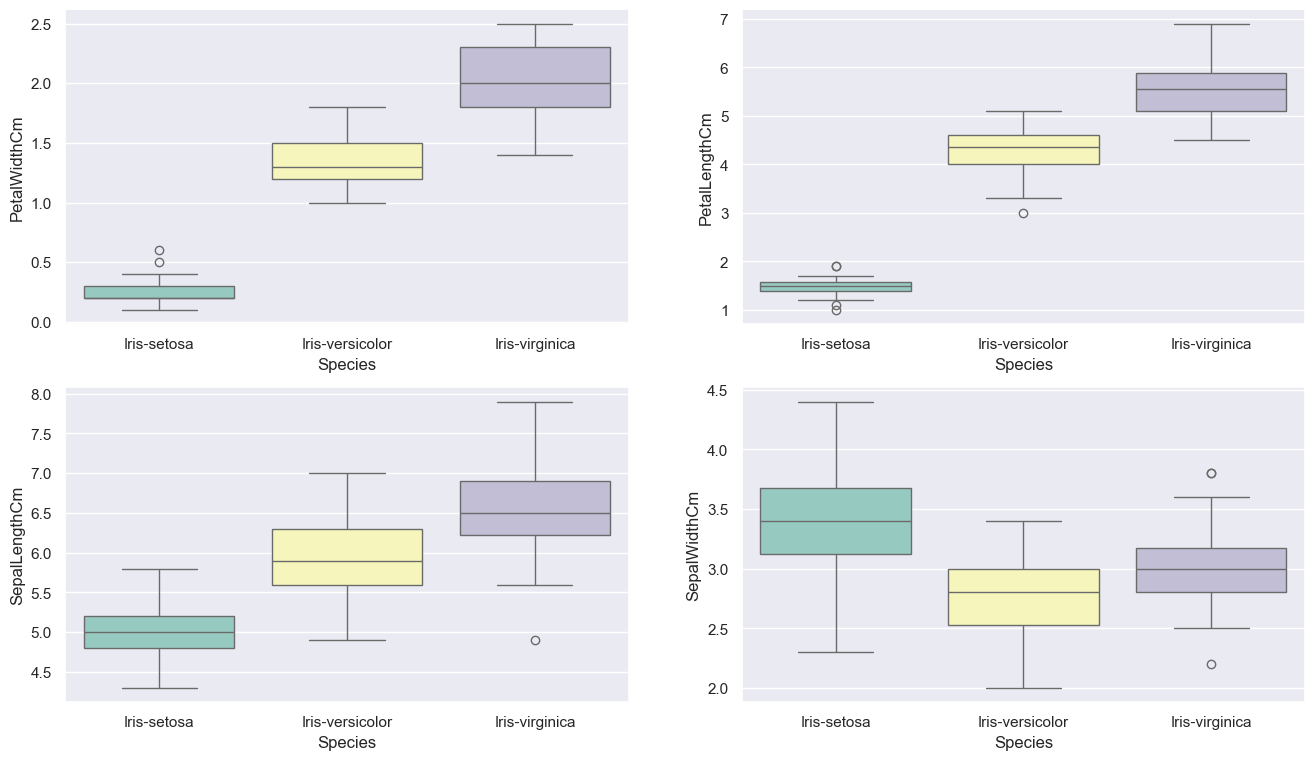

In [28]:
# Box plots to know about distribution

palette = "Set3"

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 9))

# Plot boxplots with specified color palette and setting x variable to hue
sns.boxplot(y="PetalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[0, 0], hue="Species", palette=palette, legend=False)
sns.boxplot(y="PetalLengthCm", x="Species", data=iris_data, orient="v", ax=axes[0, 1], hue="Species", palette=palette, legend=False)
sns.boxplot(y="SepalLengthCm", x="Species", data=iris_data, orient="v", ax=axes[1, 0], hue="Species", palette=palette, legend=False)
sns.boxplot(y="SepalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[1, 1], hue="Species", palette=palette, legend=False)

# Show the plot
plt.show()

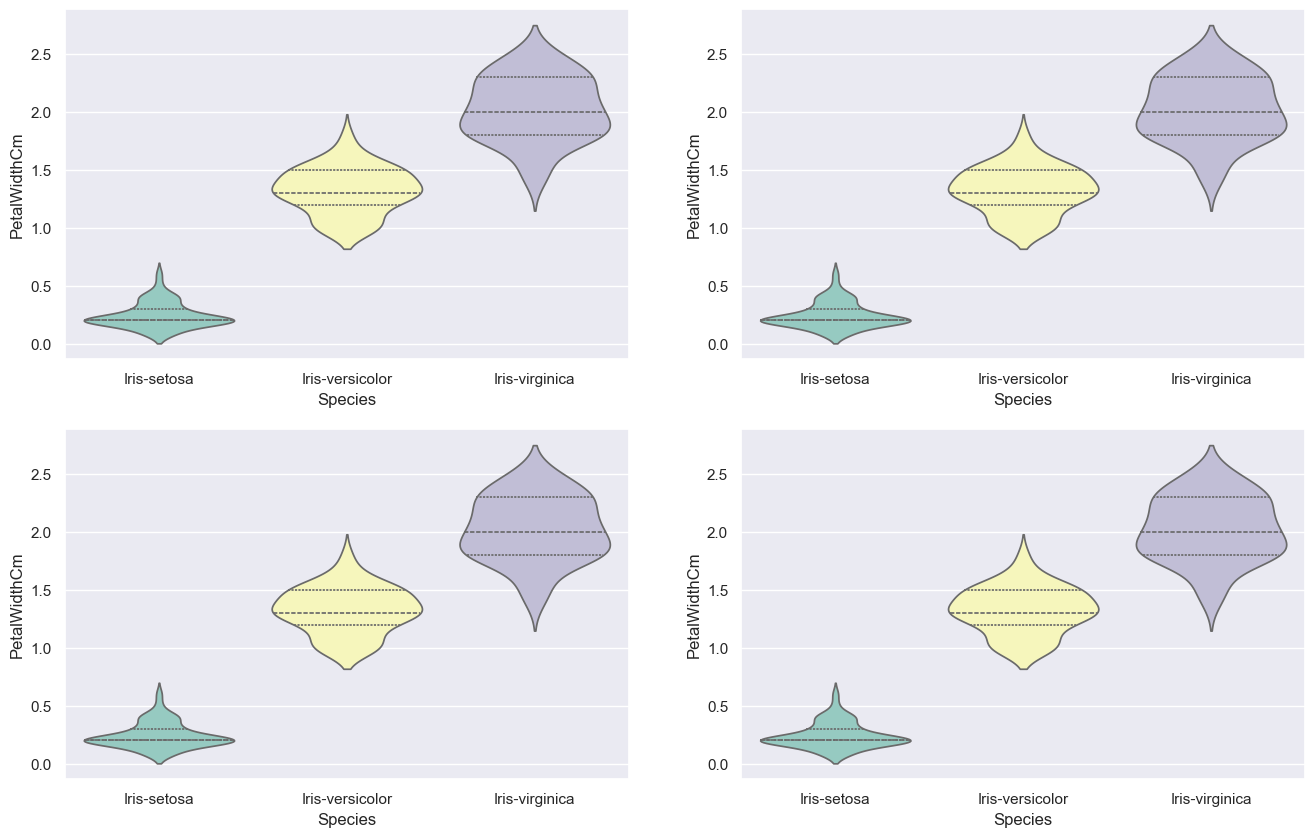

In [32]:
# Violin Plot for checking distribution
# Define the color palette
palette = "Set3"

# Create subplots
fig, axes = plt.subplots(2, 2, figsize=(16, 10))

# Plot violin plots with specified color palette and setting x variable to hue
sns.violinplot(y="PetalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[0, 0], inner="quartile", hue="Species", legend=False, palette=palette)
sns.violinplot(y="PetalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[0, 1], inner="quartile", hue="Species", legend=False, palette=palette)
sns.violinplot(y="PetalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[1, 0], inner="quartile", hue="Species", legend=False, palette=palette)
sns.violinplot(y="PetalWidthCm", x="Species", data=iris_data, orient="v", ax=axes[1, 1], inner="quartile", hue="Species", legend=False, palette=palette)
palette=palette
# Show the plot
plt.show()

In [ ]:
# Plotting the Histogram & Probability Density Function 

# sns.FacetGrid(iris_data, hue="Species", height=5) \
# .map(sns.distplot, "SepalLengthCm") \
# .add_legend()

# sns.FacetGrid(iris_data, hue="Species", height=5) \
# .map(sns.distplot, "SepalWidthCm") \
# .add_legend()

# sns.FacetGrid(iris_data, hue="Species", height=5) \
# .map(sns.distplot, "PetalLengthCm") \
# .add_legend()

# sns.FacetGrid(iris_data, hue="Species", height=5) \
# .map(sns.distplot, "PetalWidthCm") \
# .add_legend()
# plt.show()

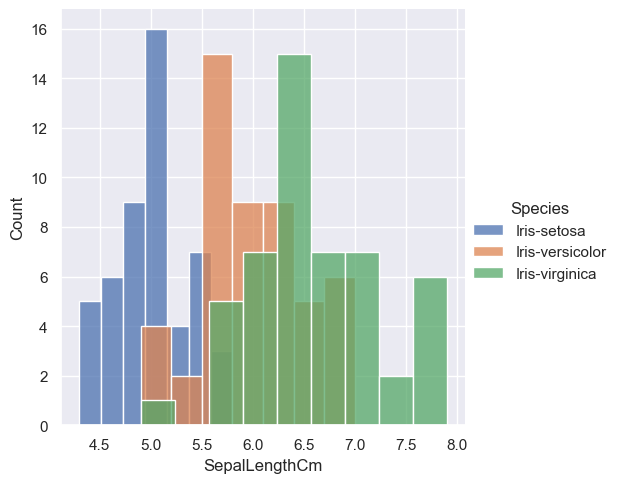

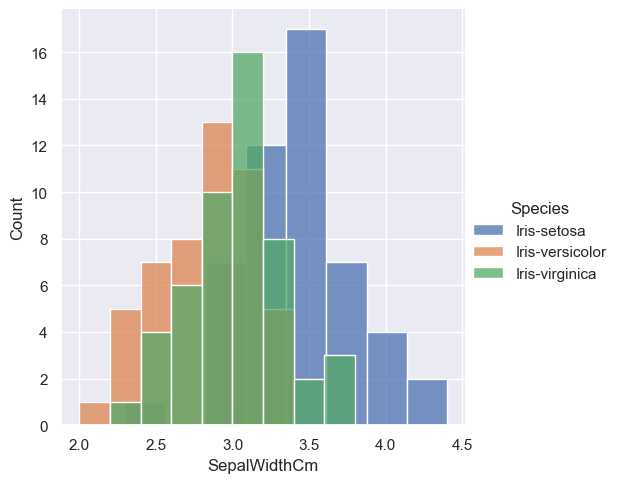

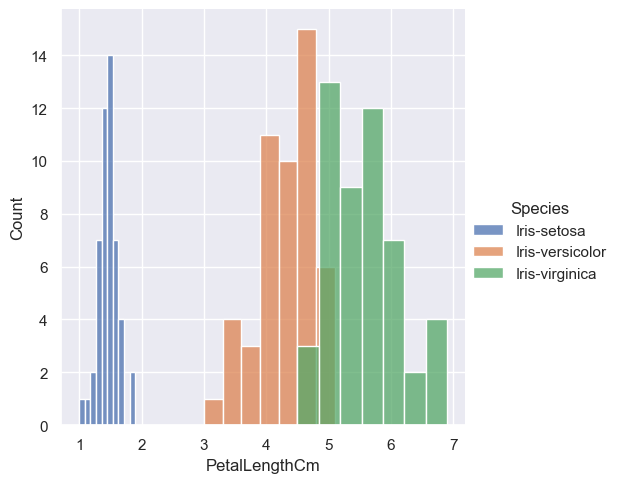

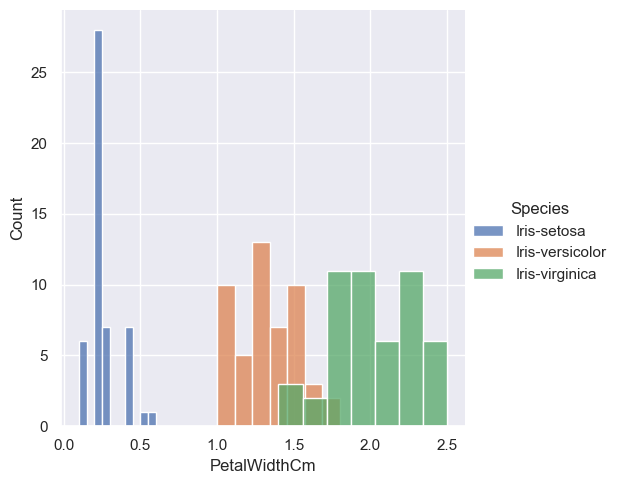

In [51]:
# Create FacetGrid and use histplot to plot distributions
sns.FacetGrid(iris_data, hue="Species", height=5) \
    .map(sns.histplot, "SepalLengthCm") \
    .add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
    .map(sns.histplot, "SepalWidthCm") \
    .add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
    .map(sns.histplot, "PetalLengthCm") \
    .add_legend()

sns.FacetGrid(iris_data, hue="Species", height=5) \
    .map(sns.histplot, "PetalWidthCm") \
    .add_legend()

plt.show()